#### Abstract : Predict the doctor fees


# Import Libraries and dataset

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the dataset
doctor = pd.read_excel("Final_Test.xlsx")

In [3]:
#view the first five records
doctor.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


### Observation:
- There are 7 columns and all the independent variables of type object
- The columns are mixed with different forms of data 

In [4]:
#checking the shape of data
doctor.shape

(1987, 6)

### There are 5961 records and 7 columns
- After proper EDA and Data Cleaning the number of records and columns will change.

In [5]:
# Checking the general information 
doctor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


### Observation

- There are null values in rating column
- There are null values in Miscellaneous_info

#### Fees - The Fees column is the target but the values seems to be discrete.
- All the independent variables are categorical, therefore supervised/classification model will be selected.

# Exploratory Data Analysis and Data Cleaning

In [6]:
#check for null values
doctor.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

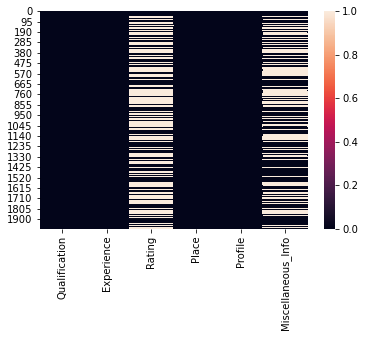

In [7]:
# heatmap to inspect null values
sns.heatmap(doctor.isnull())

###### The percentage of data missing in Rating is 55.4% - cannot drop rows - simple imputer
###### The percentage of data missing in place is  4.2%  - can drop rows  - dropna
###### the percent of data missing in miscellaneous_info is 44% - cannot drop row - simple imputer

##### split each column to get clear understanding

In [8]:
# simple imputer to remove null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
doctor["Rating"] =imp.fit_transform(doctor["Rating"].values.reshape(-1,1))
doctor["Miscellaneous_Info"] =imp.fit_transform(doctor["Miscellaneous_Info"].values.reshape(-1,1))

In [9]:
doctor.dropna(inplace = True)

In [10]:
doctor.shape

(1981, 6)

In [11]:
doctor.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

- Null values removed

##### Inspecting Each column seperately

## Quaification

In [12]:
qualification =doctor[["Qualification"]].copy()

In [13]:
qualification

,Qualification
0,MBBS
1,"MBBS, Diploma in Otorhinolaryngology (DLO)"
2,"MBBS, DDVL"
3,BAMS
4,"BDS, MDS - Conservative Dentistry & Endodontics"
...,...
1982,"BAMS, Doctor of Medicine"
1983,"MD - Dermatology , Venereology & Leprosy, MBBS"
1984,"MBBS, MD / MS - Obstetrics & Gynaecology"
1985,BDS


In [14]:
 qualification["Qualification"] = qualification["Qualification"].str.replace(",", " ").str.replace("-", "")

remove = ["'","/","(",")","&",".","smile","Year","In","in","And","AND","and",'VD','FAMS','Fellowship','of','the','Doctor','Science','Academy','Royal','College','Post', 'Graduate', 'Diploma','Crown','Bridge']

for r in remove:
    qualification["Qualification"] = qualification["Qualification"].str.replace(r, "")

In [15]:
qualification

,Qualification
0,MBBS
1,MBBS Otorholaryngology DLO
2,MBBS DDVL
3,BAMS
4,BDS MDS Conservative Dentistry Endodontics
...,...
1982,BAMS Medice
1983,MD Dermatology Venereology Leprosy MBBS
1984,MBBS MD MS Obstetrics Gynaecology
1985,BDS


In [16]:
#spliting the column
quali = qualification.Qualification.str.split().tolist()

In [17]:
quali

[['MBBS'],
 ['MBBS', 'Otorholaryngology', 'DLO'],
 ['MBBS', 'DDVL'],
 ['BAMS'],
 ['BDS', 'MDS', 'Conservative', 'Dentistry', 'Endodontics'],
 ['BDS', 'MDS'],
 ['MBBS', 'Otorholaryngology', 'DLO'],
 ['BDS', 'MDS', 'Pedodontics'],
 ['MD',
  'Ayurveda',
  'Medice',
  'BAMS',
  'Yoga',
  'Teachers',
  'Trag',
  'Course',
  'M',
  'D',
  'IN',
  'KAYACHIKISTA'],
 ['BHMS'],
 ['BDS'],
 ['MBBS', 'FCD', 'Diabetology'],
 ['MBBS', 'DDV'],
 ['MBBS', 'MD', 'Dermatology'],
 ['MS', 'ENT'],
 ['BDS'],
 ['MBBS', 'MD', 'Dermatology'],
 ['MBBS',
  'Otorholaryngology',
  'DLO',
  'MS',
  'ENT',
  'DNB',
  'ENT',
  'MNAMS',
  'Membership',
  'National'],
 ['BDS', 'MDS', 'Conservative', 'Dentistry', 'Endodontics'],
 ['MBBS', 'MD', 'Dermatology'],
 ['BHMS', 'Naturopathy', 'Yogic', 'DNYS', 'Diet', 'Nutrition', 'Cosmetology'],
 ['BDS'],
 ['MBBS', 'MD', 'Dermatology'],
 ['MBBS', 'PG', 'Clical', 'Cosmetology', 'PGDCC'],
 ['MBBS'],
 ['MBBS', 'Otorholaryngology', 'DLO'],
 ['BDS', 'MDS', 'Periodontics'],
 ['BDS', 'M

In [18]:
#create the dataframe with column
df_quali = pd.DataFrame(quali)

In [19]:
df_quali

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,MBBS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,MBBS,Otorholaryngology,DLO,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,MBBS,DDVL,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,BAMS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BDS,MDS,Conservative,Dentistry,Endodontics,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,BAMS,Medice,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1977,MD,Dermatology,Venereology,Leprosy,MBBS,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1978,MBBS,MD,MS,Obstetrics,Gynaecology,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1979,BDS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
df_quali = df_quali[[0,1,2]].copy()

In [21]:
#Selecting the first three columns
df_quali

,0,1,2
0,MBBS,None,None
1,MBBS,Otorholaryngology,DLO
2,MBBS,DDVL,None
3,BAMS,None,None
4,BDS,MDS,Conservative
...,...,...,...
1976,BAMS,Medice,None
1977,MD,Dermatology,Venereology
1978,MBBS,MD,MS
1979,BDS,None,None


In [22]:
#rename first three columns

df_quali.rename(columns ={0 : "UG", 1:"PG", 2:"Specialization"}, inplace=True)

In [23]:
df_quali

,UG,PG,Specialization
0,MBBS,None,None
1,MBBS,Otorholaryngology,DLO
2,MBBS,DDVL,None
3,BAMS,None,None
4,BDS,MDS,Conservative
...,...,...,...
1976,BAMS,Medice,None
1977,MD,Dermatology,Venereology
1978,MBBS,MD,MS
1979,BDS,None,None


In [24]:
df_quali.isnull().sum()

UG                  0
PG                566
Specialization    702
dtype: int64

In [25]:
df_quali.shape

(1981, 3)

In [26]:
print(df_quali["UG"].unique())


['MBBS' 'BAMS' 'BDS' 'MD' 'BHMS' 'MS' 'BSc' 'Aestic' 'MDS' 'LCEH' 'DM'
 'Diabetology' 'Certificate' 'D' 'DDVL' 'DNB' 'Homeopathic' 'DHMS' 'FRCP'
 'Otorholaryngology' 'BSAM' 'DO' 'FRCS' 'FWFO' 'Child' 'Dermatology'
 'Hospital' 'DMS' 'MDDVL' 'Ayurvedic' 'BPThBPT' 'Medice' 'ENT' 'PhD'
 'FICD' 'DEHM' 'MRCGP' 'FPFA' 'Cardiology' 'MRCS' 'MRCP' 'Certification'
 'DPM']


In [27]:
df_quali["UG"].value_counts()


MBBS                 865
BDS                  371
BHMS                 232
BAMS                 228
MD                    92
MDS                   61
MS                    37
DNB                   13
DDVL                  13
DHMS                  11
BSc                   11
Otorholaryngology      6
LCEH                   5
Dermatology            3
Aestic                 2
DM                     2
BSAM                   2
Certificate            2
MRCP                   1
FPFA                   1
DPM                    1
D                      1
FRCS                   1
Medice                 1
MDDVL                  1
Certification          1
Hospital               1
BPThBPT                1
Cardiology             1
Child                  1
DMS                    1
DEHM                   1
Ayurvedic              1
DO                     1
PhD                    1
Diabetology            1
FWFO                   1
FRCP                   1
FICD                   1
MRCGP                  1


In [28]:
ug = ['BHMS', 'BAMS', 'MBBS', 'BSc', 'BDS', 'MDS', 'Dermatology', 'DM', 'MD', 'MDSOral'
 ,'PhD', 'MRCPS', 'MS', 'DDVL', 'DHMS', 'GCEH', 'Healthcare', 'DNB',
 'Certification' ,'Laryngology', 'FAGE', 'Aestic', 'BSAM', 'Family', 'FNB'
, 'Dermotology' ,'Certificate' ,'Certified','LCEH', 'Homeopathic', 'Child'
, 'Otorholaryngology',  'MSc' ,  'Medical' ,'FCPS', 'GAMS',
 'BUMS' ,'Diet', 'MBA',  'PG', 'POST', 'Oral', 'Diabetology', 'MCh', 'DDV',
  'BEMS', 'MRCS', 'Periodontics', 'MA', 'MPH', 'MRCPCH', 'FRCS', 'BAc',
 'BIMS', 'Trichology',  'Ayurvedic', 'DHM',  'Diabetic',
 'MRCGP' ,'Naturopathy', 'MRCP', 'CGO', 'PGD', 'DNHE', 'FRGUHS' , 'FRCP',
 'Clical', 'Cochlear' ,'Masters' ,'PDCC' ,'FFDRCSI', 'MDDVL' ,'DGO']

In [29]:
df = df_quali.loc[df_quali["UG"].isin(ug)]

In [30]:
df

,UG,PG,Specialization
0,MBBS,None,None
1,MBBS,Otorholaryngology,DLO
2,MBBS,DDVL,None
3,BAMS,None,None
4,BDS,MDS,Conservative
...,...,...,...
1976,BAMS,Medice,None
1977,MD,Dermatology,Venereology
1978,MBBS,MD,MS
1979,BDS,None,None


In [31]:
df["UG"].value_counts()

MBBS                 865
BDS                  371
BHMS                 232
BAMS                 228
MD                    92
MDS                   61
MS                    37
DDVL                  13
DNB                   13
DHMS                  11
BSc                   11
Otorholaryngology      6
LCEH                   5
Dermatology            3
BSAM                   2
Certificate            2
Aestic                 2
DM                     2
MDDVL                  1
MRCP                   1
Child                  1
Certification          1
FRCS                   1
Ayurvedic              1
PhD                    1
Diabetology            1
FRCP                   1
MRCGP                  1
MRCS                   1
Homeopathic            1
Name: UG, dtype: int64

In [32]:
df.shape

(1968, 3)

In [33]:
Qualification = df[["UG"]].copy()

In [34]:
Qualification 

,UG
0,MBBS
1,MBBS
2,MBBS
3,BAMS
4,BDS
...,...
1976,BAMS
1977,MD
1978,MBBS
1979,BDS


### Experience column

In [35]:
experience = doctor[["Experience"]].copy()
experience = experience.Experience.str.split().tolist()
df_exp = pd.DataFrame(experience, columns=["Experience", 0, 1])
df_exp = df_exp[["Experience"]].copy()
df_exp["Experience"]= df_exp["Experience"].astype("int")

In [36]:
df_exp.head()

,Experience
0,35
1,31
2,40
3,0
4,16


### Rating Column

In [37]:
rating = doctor[["Rating"]].copy()
rating["Rating"] = rating["Rating"].str.replace("%", "")
rating = rating.Rating.str.split().tolist()

df_rate = pd.DataFrame(rating, columns=["Rating"])
df_rate["Rating"] = df_rate["Rating"].astype(int)
df_rate.head()

,Rating
0,100
1,100
2,70
3,100
4,100


### Place column

In [38]:
place = doctor[["Place"]].copy()
place["Place"] = place["Place"].str.replace(" ", "")
place["Place"] = place["Place"].str.replace(",", " ").str.replace("-", "")
place = place.Place.str.split().tolist()
df_place = pd.DataFrame(place)
print(df_place[1].unique())
df_place[1] = df_place[1].replace("Sector5", "Delhi")
df_place = df_place[[0,1]].copy()
df_place.rename(columns = {0:"Area", 1:"City"}, inplace=True)
print(df_place.head())
place = df_place[["City"]].copy()

['Mumbai' 'Hyderabad' 'Chennai' 'Delhi' 'Bangalore' 'Coimbatore'
 'Thiruvananthapuram' 'Ernakulam']
              Area       City
0    GhatkoparEast     Mumbai
1  WestMarredpally  Hyderabad
2          KKNagar    Chennai
3    NewAshokNagar      Delhi
4    KanakpuraRoad  Bangalore


In [39]:
df_place["City"].unique()

array(['Mumbai', 'Hyderabad', 'Chennai', 'Delhi', 'Bangalore',
       'Coimbatore', 'Thiruvananthapuram', 'Ernakulam'], dtype=object)

In [40]:
place.head()

,City
0,Mumbai
1,Hyderabad
2,Chennai
3,Delhi
4,Bangalore


In [41]:
place.isnull().sum()

City    0
dtype: int64

In [42]:
place  = place.fillna(df_place.mode().iloc[0])

#### Miscellaneous_Info

In [43]:
M_info  = doctor[["Miscellaneous_Info"]]
M_info = M_info.Miscellaneous_Info.str.split().tolist()
df_m = pd.DataFrame(M_info)
df_m = df_m[[0]].copy()
df_m.rename(columns = {0:"comments"}, inplace = True)
c = df_m["comments"]
# using regex to find the comments
c.replace(r'^[0-9][0-9]%', "Unknown", regex=True, inplace=True)
c.replace(r'^[0-9]$', "Unknown", regex=True, inplace=True)
c.replace(r'^[7]%', "Unknown", regex=True, inplace=True)
c.replace("100%", "Unknown", inplace=True)

In [44]:
c.unique()

array(['Acrylic', 'Unknown', 'General', 'RCT', 'Dental', 'Laser',
       'Mukherjee', 'Ceramic', 'Crowns', 'Artificial', 'Balance',
       'Treatment', 'Wrinkle', 'Patparganj,', 'Dermabrasion', 'Acne',
       'Diabetes', 'Tympanoplasty', 'Whitefield,', 'Chest', 'Oral', 'ENT',
       'Orthodontic', 'Homeopathy', 'Saket,', 'Rohini,', 'Scaling',
       'Skin', 'Bronchoscopy', 'Orthodontics', 'Presurgical', 'Otoplasty',
       'Cosmetic/', 'Powai,', 'Scar', 'Hypertension', 'Conservative',
       'Invisible/Clear', 'Impaction', 'Health', 'Tooth', 'Endoscopic',
       'Viral', 'Paschim', 'Gum', 'Prabhadevi,', 'Thyroid', 'Ear',
       'Perungudi,', 'Nasal', 'Anti', 'Pulpectomy', 'BPS',
       'Reconstructive', 'Hair', 'Cosmetic', 'Flap', 'Mandibular',
       'Functional', 'Fever', 'Tropical', 'Fixed', 'Cardio',
       'Osseointegrated', 'Gall', 'Gynae', 'Minimally', 'Panchsheel',
       'Fistula', 'Insulin', 'Abscess', 'Aesthetic', 'Holistic', 'Wisdom',
       'Mahim,', 'Cleaning', 'Dentofaci

In [45]:
df_mis = c.to_frame()


In [47]:
profile = doctor[['Profile']].copy()

#### Column to be joined using new dataframes
- Qualification 
- Place
- df_exp
- df_mis
- df_Rate
- Profile


#### concat the dataframes one at a time

In [48]:
doc = pd.DataFrame()
li = [Qualification,place,df_exp,df_mis,profile]

doc = pd.concat([Qualification,place], axis=1, join="inner")

In [49]:
doc

,UG,City
0,MBBS,Mumbai
1,MBBS,Hyderabad
2,MBBS,Chennai
3,BAMS,Delhi
4,BDS,Bangalore
...,...,...
1976,BAMS,Bangalore
1977,MD,Chennai
1978,MBBS,Chennai
1979,BDS,Bangalore


In [50]:
doc_one = pd.concat([doc,df_exp], axis=1, join="inner")

In [51]:
print(doc_one.shape)
doc_one.head()

(1968, 3)


,UG,City,Experience
0,MBBS,Mumbai,35
1,MBBS,Hyderabad,31
2,MBBS,Chennai,40
3,BAMS,Delhi,0
4,BDS,Bangalore,16


In [52]:
doc_two = pd.concat([doc_one,df_mis], axis=1, join="inner")

In [53]:
doc_two

,UG,City,Experience,comments
0,MBBS,Mumbai,35,Acrylic
1,MBBS,Hyderabad,31,Acrylic
2,MBBS,Chennai,40,Unknown
3,BAMS,Delhi,0,Acrylic
4,BDS,Bangalore,16,General
...,...,...,...,...
1976,BAMS,Bangalore,10,Acrylic
1977,MD,Chennai,4,Acrylic
1978,MBBS,Chennai,9,Acrylic
1979,BDS,Bangalore,12,RCT


In [54]:
Doc_the = pd.concat([doc_two,profile], axis=1, join="inner")

In [55]:
Doc_the.head()

,UG,City,Experience,comments,Profile
0,MBBS,Mumbai,35,Acrylic,General Medicine
1,MBBS,Hyderabad,31,Acrylic,ENT Specialist
2,MBBS,Chennai,40,Unknown,Dermatologists
3,BAMS,Delhi,0,Acrylic,Ayurveda
4,BDS,Bangalore,16,General,Dentist


In [56]:
Doc =  pd.concat([Doc_the,df_rate], axis=1, join="inner")

In [57]:
Doc.head()

,UG,City,Experience,comments,Profile,Rating
0,MBBS,Mumbai,35,Acrylic,General Medicine,100
1,MBBS,Hyderabad,31,Acrylic,ENT Specialist,100
2,MBBS,Chennai,40,Unknown,Dermatologists,70
3,BAMS,Delhi,0,Acrylic,Ayurveda,100
4,BDS,Bangalore,16,General,Dentist,100


# Univariate analysis

MBBS                 862
BDS                  369
BHMS                 232
BAMS                 228
MD                    91
MDS                   61
MS                    37
DDVL                  13
DNB                   13
DHMS                  11
BSc                   11
Otorholaryngology      6
LCEH                   5
Dermatology            3
BSAM                   2
Certificate            2
Aestic                 2
DM                     2
MDDVL                  1
MRCP                   1
Child                  1
Certification          1
FRCS                   1
Ayurvedic              1
PhD                    1
Diabetology            1
FRCP                   1
MRCGP                  1
MRCS                   1
Homeopathic            1
Name: UG, dtype: int64

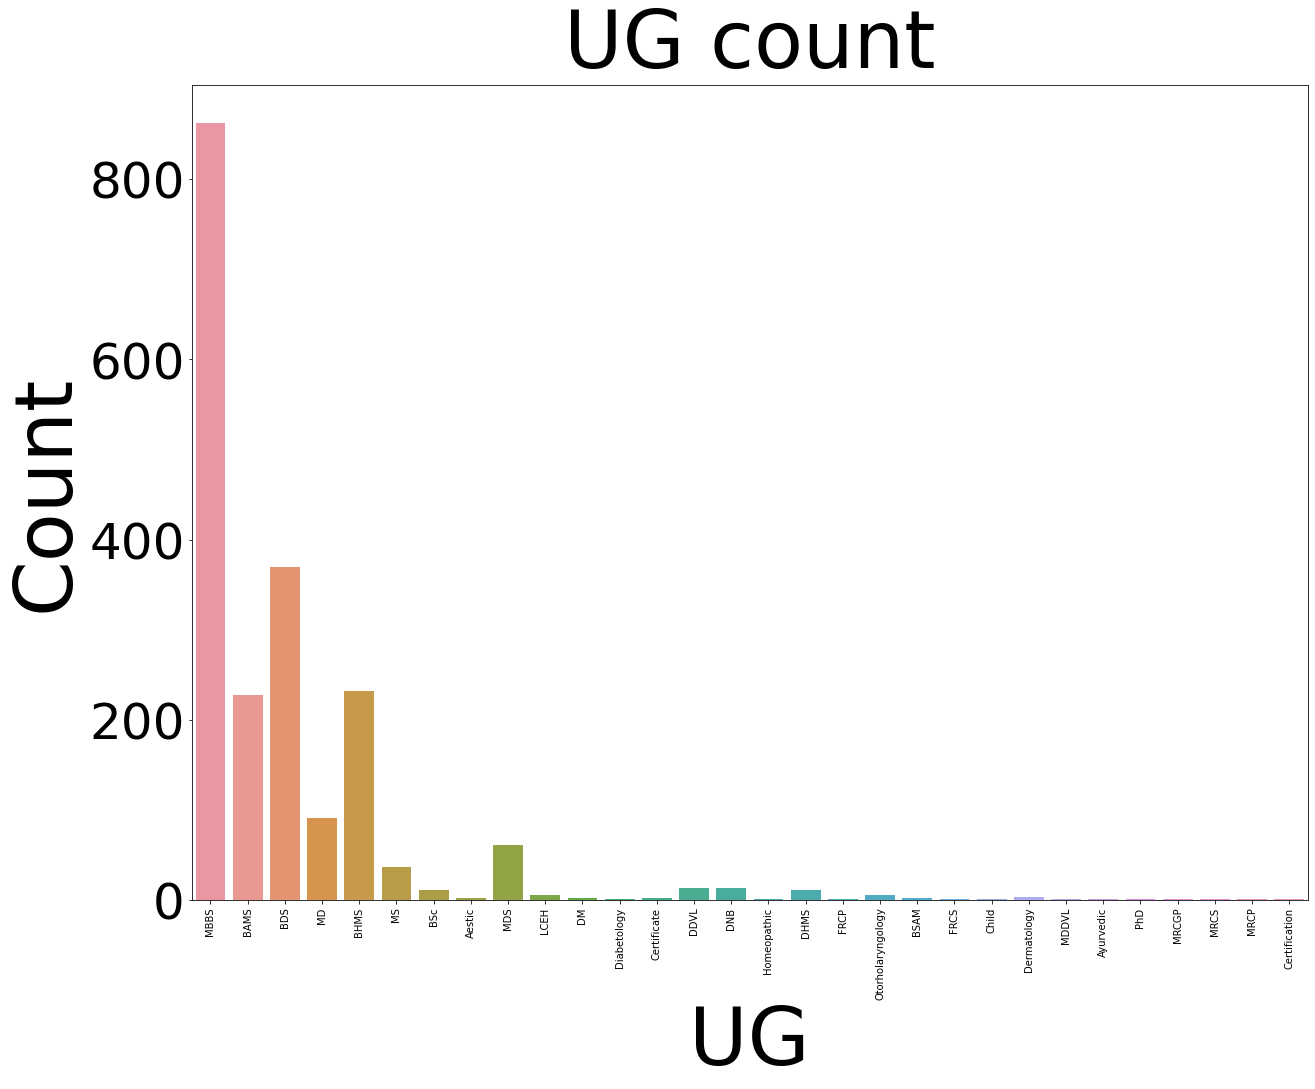

In [58]:
#count plot for categorical variable 
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="UG")
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
plt.xlabel("UG",fontsize=80)
plt.ylabel("Count",fontsize=80)
plt.title("UG count", fontsize = 80)
Doc["UG"].value_counts()

### MBBS seems to have the Highest count in qualification

Bangalore             418
Delhi                 409
Mumbai                385
Hyderabad             330
Chennai               286
Coimbatore             69
Ernakulam              48
Thiruvananthapuram     17
Name: City, dtype: int64

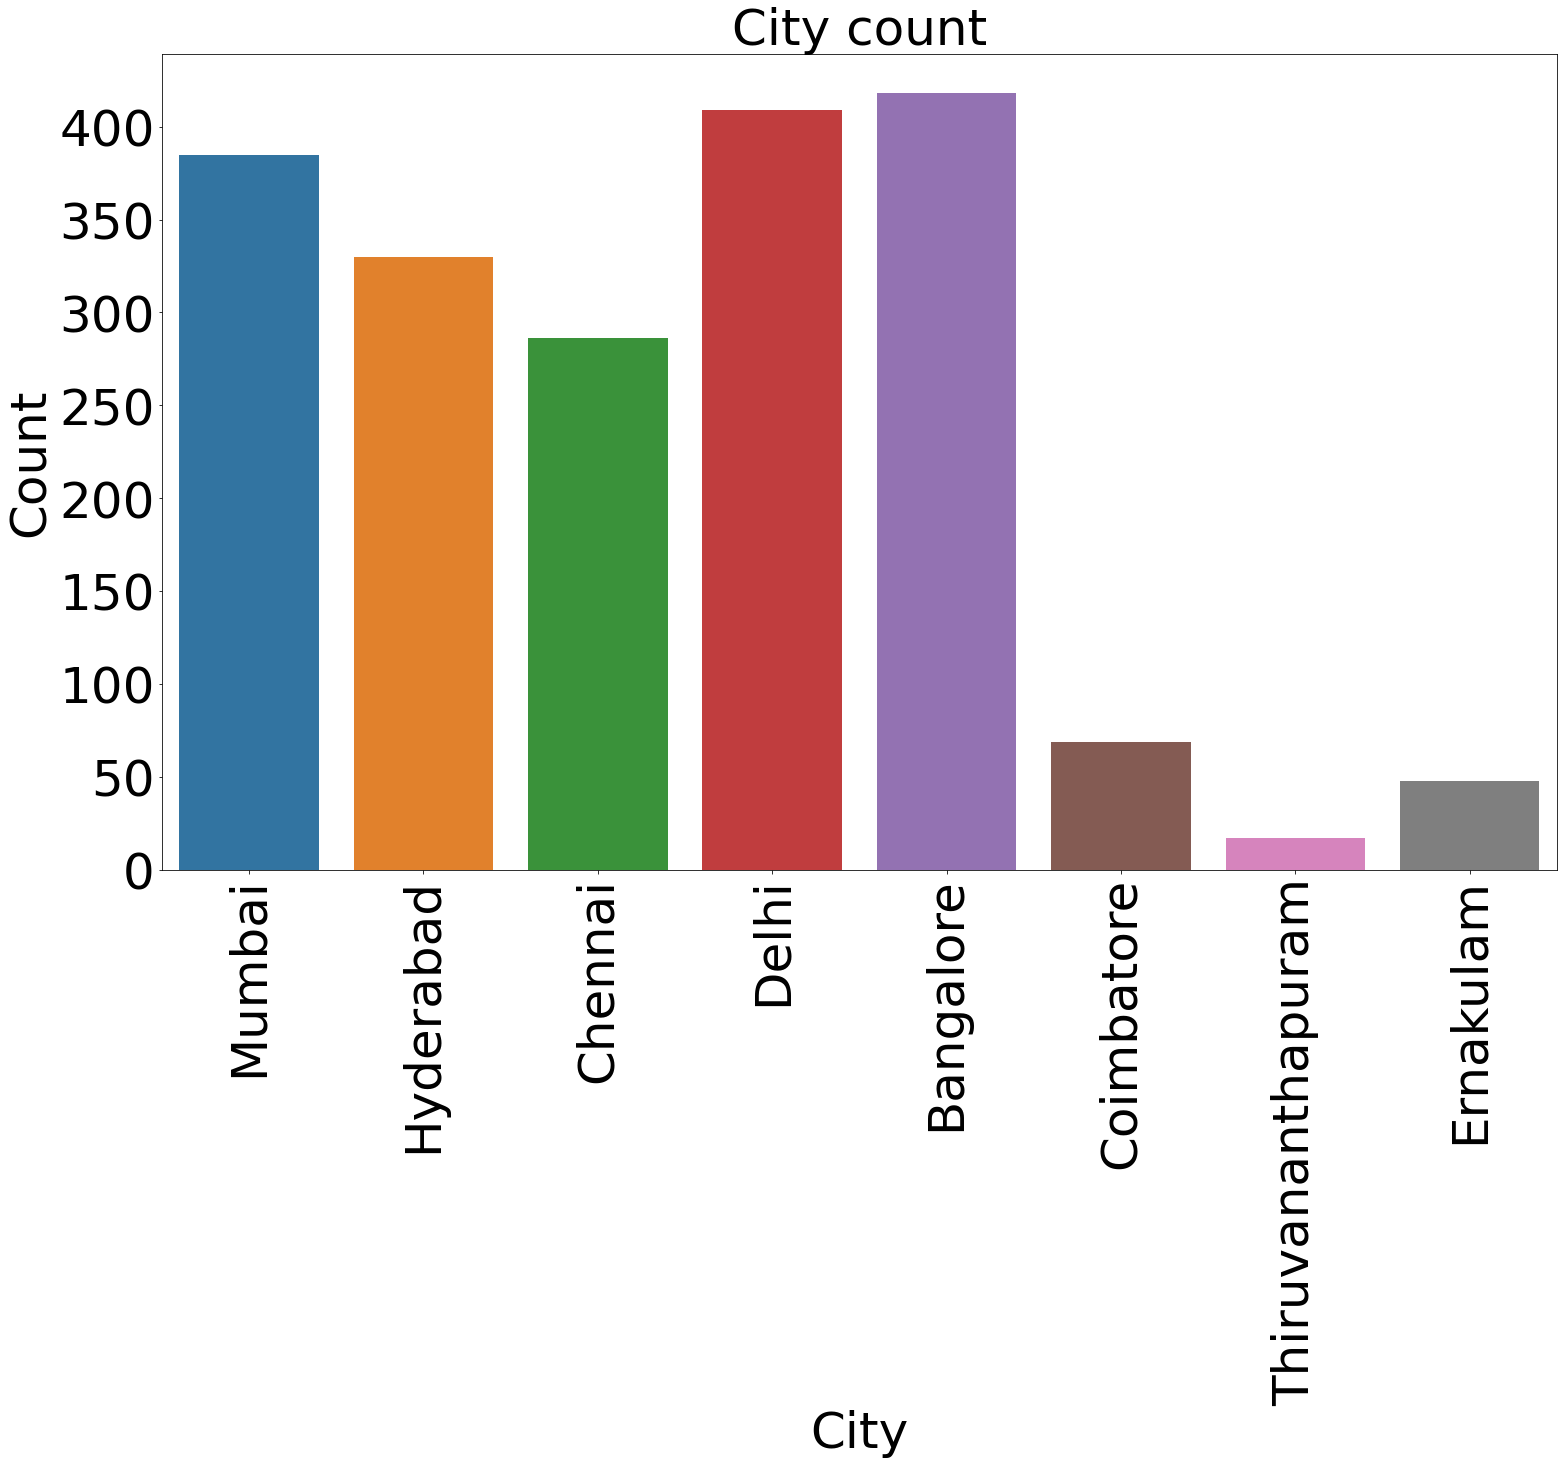

In [59]:
#count plot for categorical variable 
fig_size = (25,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="City")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("City",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("City count", fontsize = 50)
Doc["City"].value_counts()

#### The Banglore population count is highest of all, followed by mumbai at 1207, delhi at 1175, Hyderbad at 948 and so on

General Medicine    441
Dentist             436
Dermatologists      329
Homeopath           274
Ayurveda            249
ENT Specialist      233
Name: Profile, dtype: int64

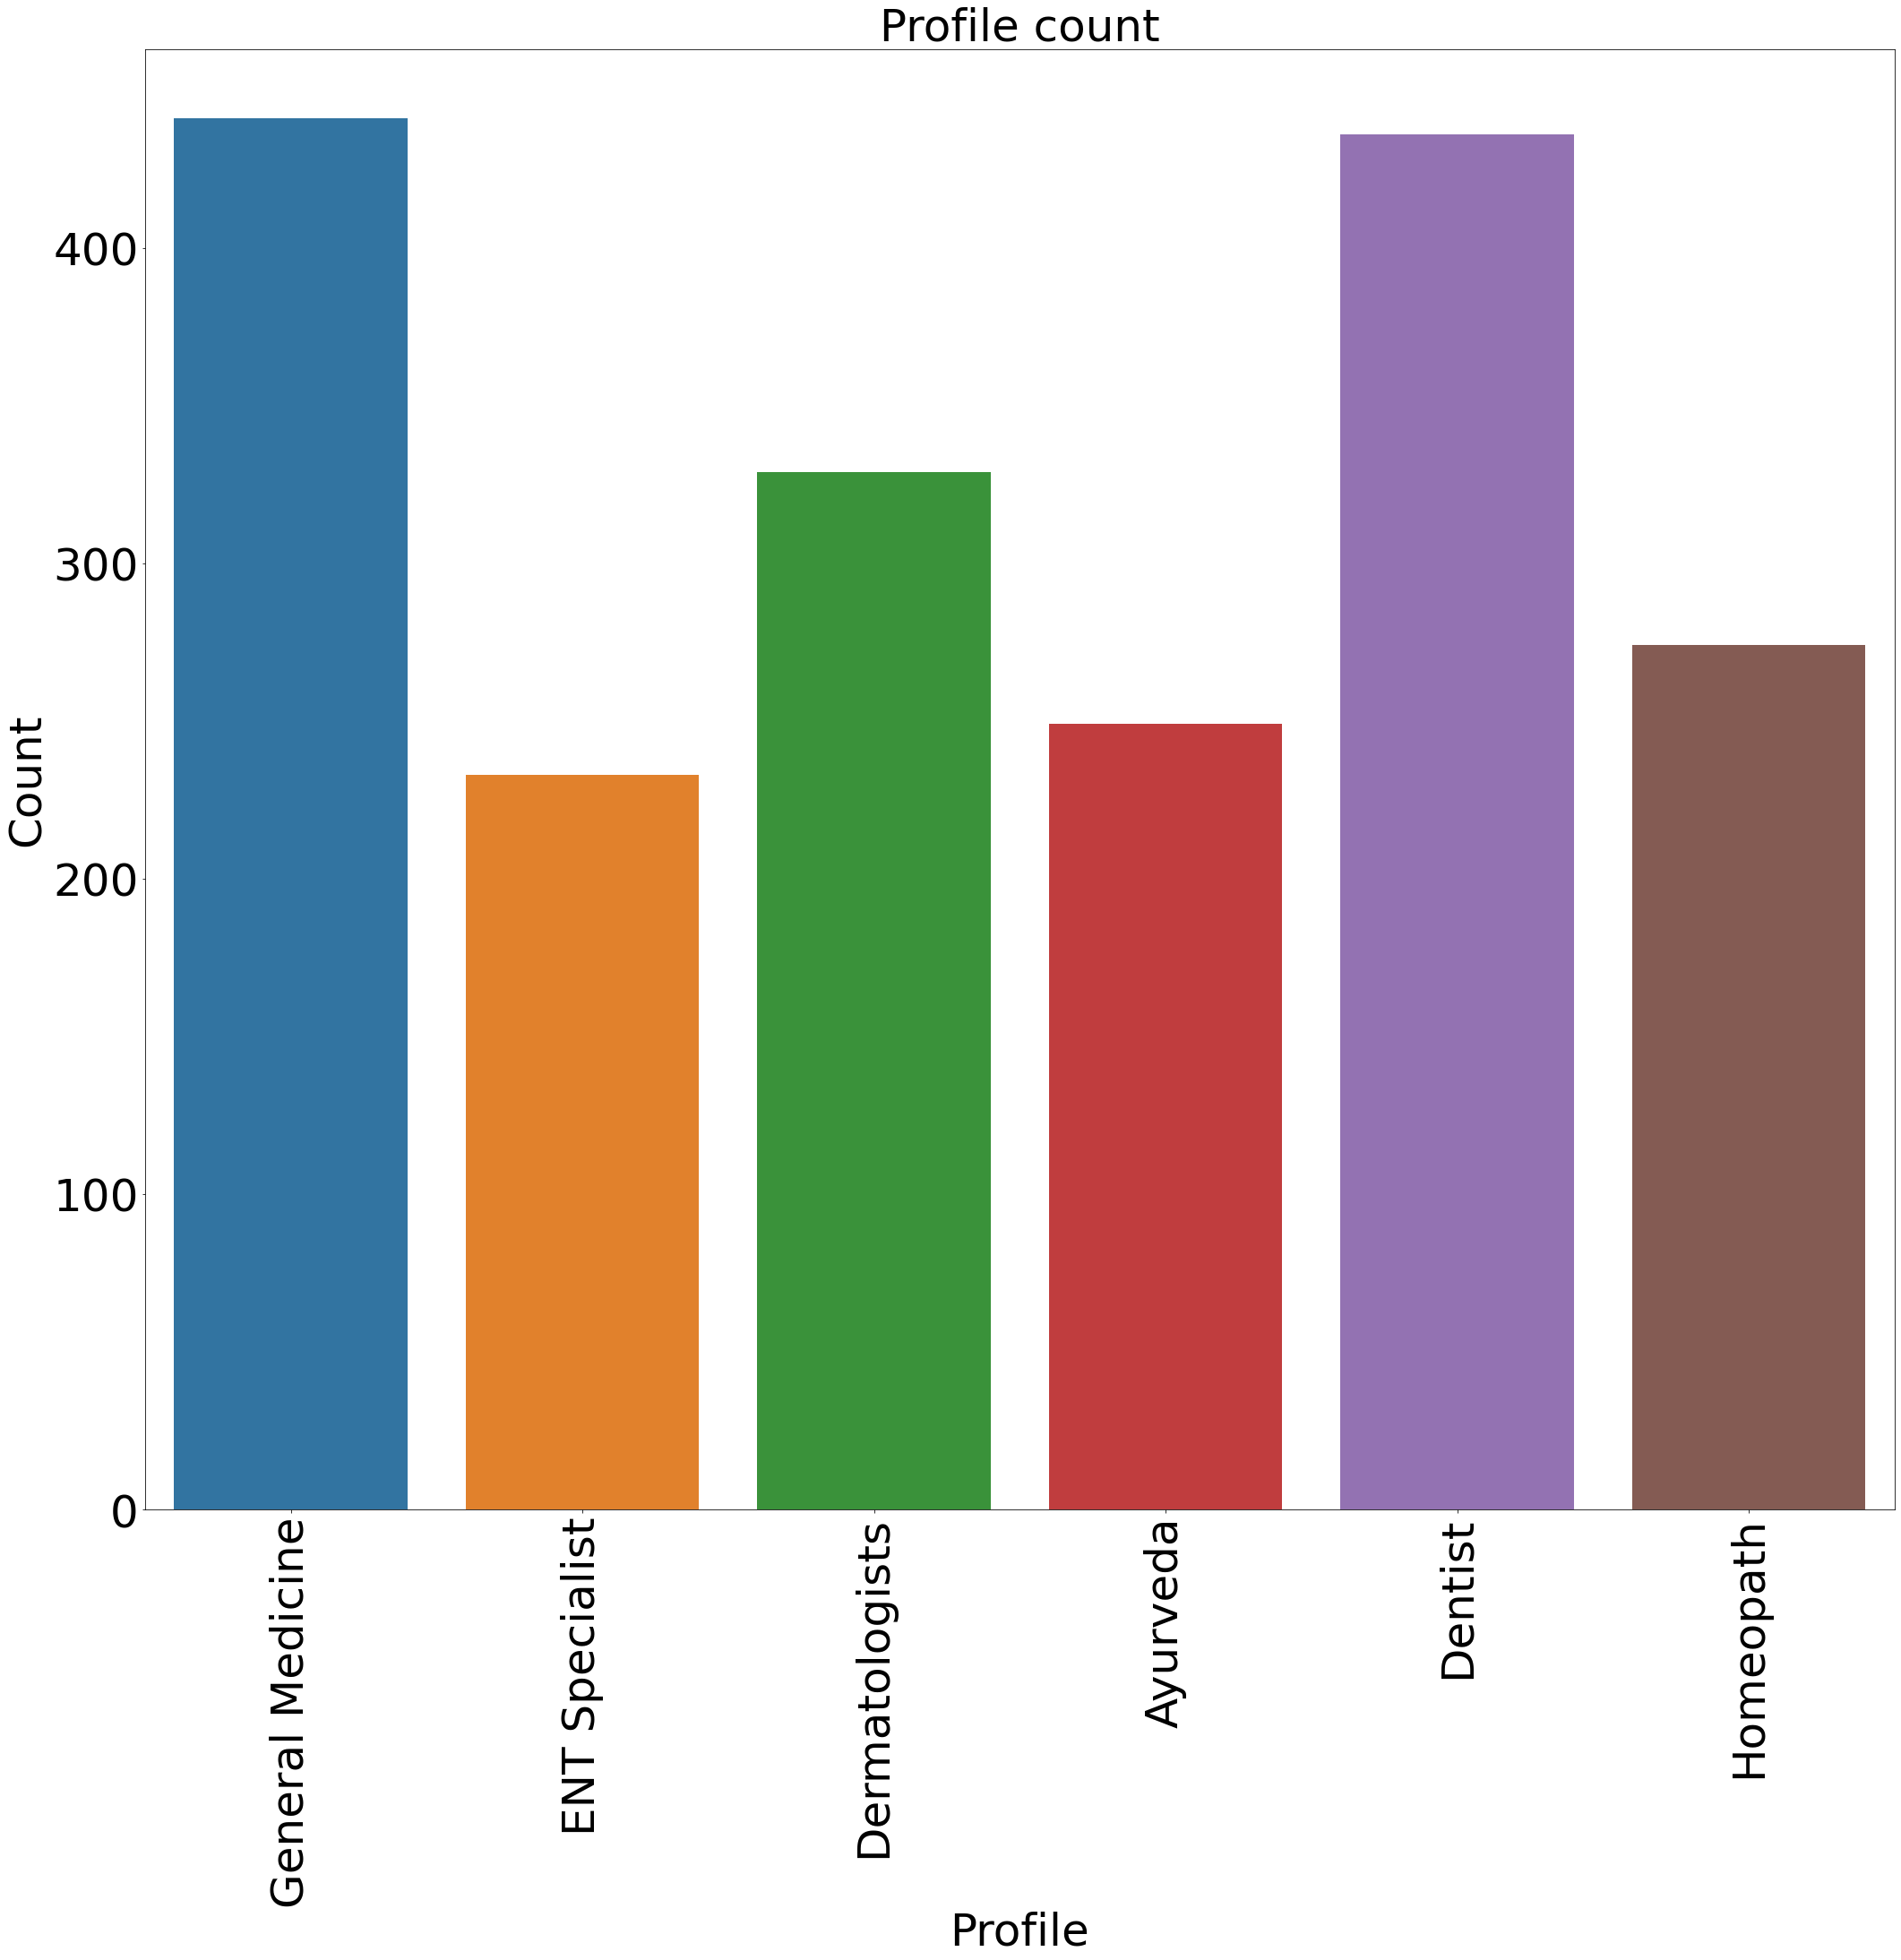

In [60]:
#count plot for categorical variable 
fig_size = (35,30)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="Profile")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Profile",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("Profile count", fontsize = 50)
Doc["Profile"].value_counts()

### dentist have the highest count of all followed by General medicine and deramtologists. ENT specialist have the lowest count

100    1299
98      112
97       82
99       67
96       64
94       48
95       47
93       33
92       29
90       28
91       26
88       13
83       11
89       11
87       11
82        8
85        8
84        7
80        7
71        7
86        6
73        5
67        5
76        4
70        4
81        3
60        3
55        3
79        2
69        2
64        2
78        1
77        1
65        1
53        1
52        1
Name: Rating, dtype: int64

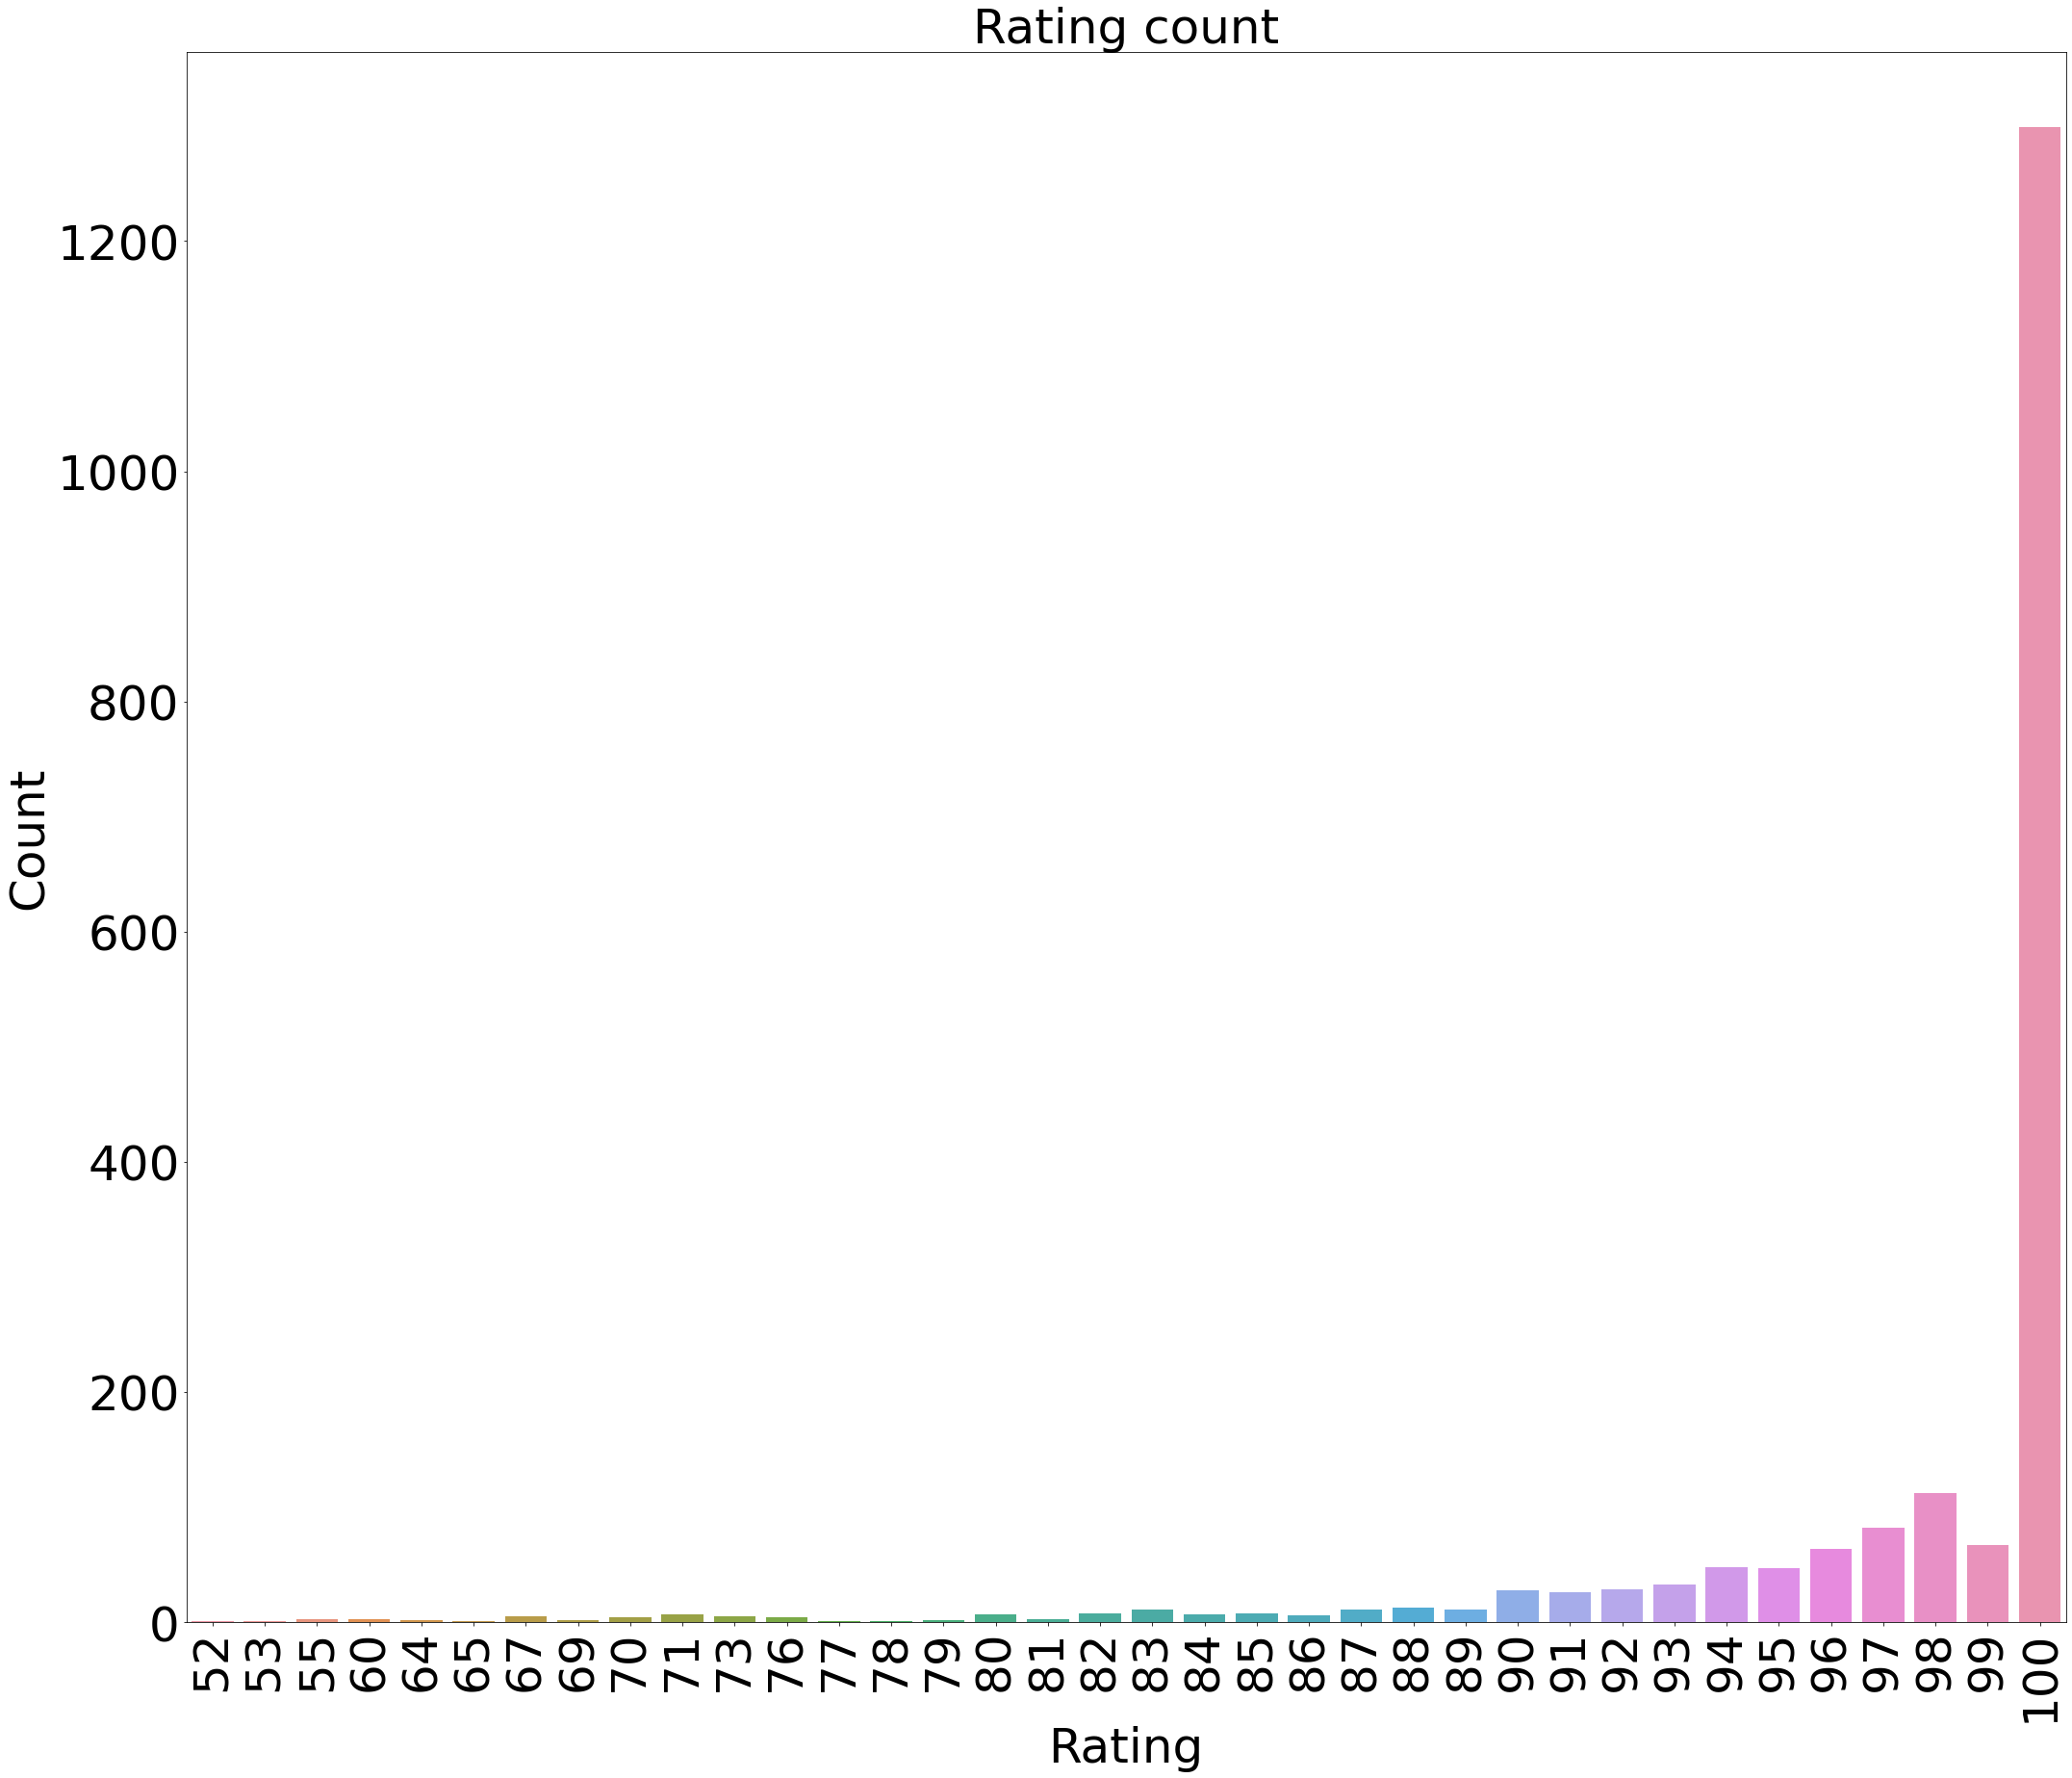

In [61]:
#count plot for categorical variable 
fig_size = (35,30)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="Rating")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Rating",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("Rating count", fontsize = 50)
Doc["Rating"].value_counts()

#### Most of the Doctors are rated to give 100% satisfaction and service 

# Multivariate Analysis

## Summary statistics

In [64]:
Doc.describe()

,Experience,Rating
count,1962.000000,1962.000000
mean,17.893986,97.511723
std,11.349933,5.748344
min,0.000000,52.000000
25%,9.000000,98.000000
50%,15.000000,100.000000
75%,24.000000,100.000000
max,65.000000,100.000000


###  Since other independent variables are categorical they are not included in the summary stat
- huge difference in the range  - needs scalling
- huge difference between mean and standard deviation

### Correlation Matrix

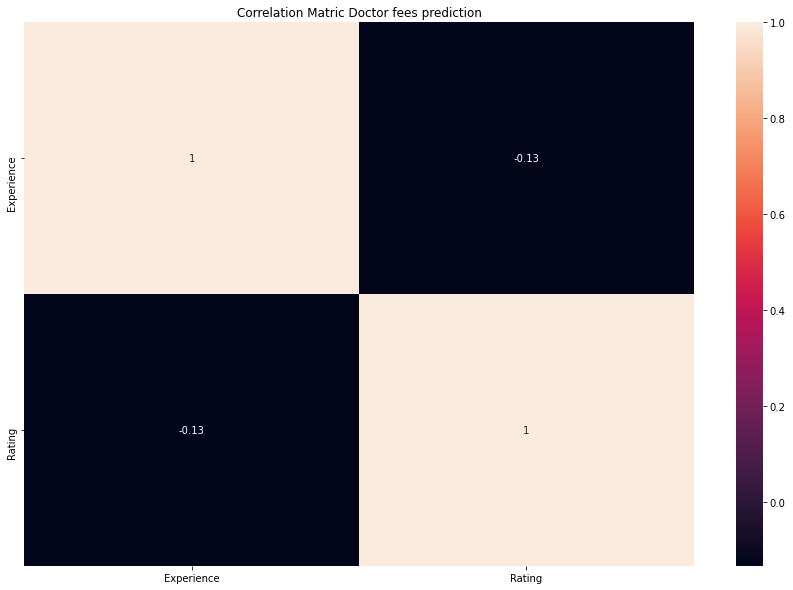

In [65]:
correlation = Doc.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric Doctor fees prediction")
plt.show()

### Label encoding

In [67]:
# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

Doc["UG"] = LE.fit_transform(Doc["UG"])
    

In [68]:
Doc

,UG,City,Experience,comments,Profile,Rating
0,20,Mumbai,35,Acrylic,General Medicine,100
1,20,Hyderabad,31,Acrylic,ENT Specialist,100
2,20,Chennai,40,Unknown,Dermatologists,70
3,2,Delhi,0,Acrylic,Ayurveda,100
4,3,Bangalore,16,General,Dentist,100
...,...,...,...,...,...,...
1976,2,Bangalore,10,Acrylic,ENT Specialist,100
1977,21,Chennai,4,Acrylic,General Medicine,100
1978,20,Chennai,9,Acrylic,Dentist,100
1979,3,Bangalore,12,RCT,Dentist,98


# ONE HOT ENCODING

In [69]:
#Introducing one hot encoder to convert categorical feature 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
toen = ["City", "Profile"]

new2 = ohe.fit_transform(Doc["City"].values.reshape(-1,1)).toarray()
new_df2 = pd.DataFrame(new2)

new = ohe.fit_transform(Doc["Profile"].values.reshape(-1,1)).toarray()
new_df = pd.DataFrame(new, columns = [np.unique(Doc["Profile"])])



In [70]:
new_df

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1957,0.0,0.0,0.0,1.0,0.0,0.0
1958,0.0,0.0,0.0,0.0,1.0,0.0
1959,0.0,1.0,0.0,0.0,0.0,0.0
1960,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
#concat encoded profile with data frame
Doc = pd.concat([Doc, new_df], join = "inner", axis = 1)

In [72]:
Doc.head()


,UG,City,Experience,comments,Profile,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)"
0,20,Mumbai,35,Acrylic,General Medicine,100,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Hyderabad,31,Acrylic,ENT Specialist,100,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Chennai,40,Unknown,Dermatologists,70,0.0,0.0,1.0,0.0,0.0,0.0
3,2,Delhi,0,Acrylic,Ayurveda,100,1.0,0.0,0.0,0.0,0.0,0.0
4,3,Bangalore,16,General,Dentist,100,0.0,1.0,0.0,0.0,0.0,0.0


- successfully joined

In [73]:
#drop the orginal column
Doc = Doc.drop("Profile", axis=1)

In [74]:
Doc.head()

,UG,City,Experience,comments,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)"
0,20,Mumbai,35,Acrylic,100,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Hyderabad,31,Acrylic,100,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Chennai,40,Unknown,70,0.0,0.0,1.0,0.0,0.0,0.0
3,2,Delhi,0,Acrylic,100,1.0,0.0,0.0,0.0,0.0,0.0
4,3,Bangalore,16,General,100,0.0,1.0,0.0,0.0,0.0,0.0


- Succefully dropped the profile column

In [75]:
#join encoded city column with Doc
Doc = pd.concat([Doc, new_df2], join = "inner", axis = 1)

In [76]:
Doc.head()

,UG,City,Experience,comments,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,20,Mumbai,35,Acrylic,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Hyderabad,31,Acrylic,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Chennai,40,Unknown,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Delhi,0,Acrylic,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,Bangalore,16,General,100,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- columns added

In [77]:
#drop city
Doc 

,UG,City,Experience,comments,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,20,Mumbai,35,Acrylic,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Hyderabad,31,Acrylic,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,Chennai,40,Unknown,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Delhi,0,Acrylic,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,Bangalore,16,General,100,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,4,Hyderabad,3,Acrylic,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958,3,Coimbatore,8,Acrylic,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,20,Chennai,35,Unknown,88,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1960,21,Chennai,24,Acrylic,100,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
Doc = Doc.drop("City", axis=1)

- dropped city column

In [79]:
Doc.head()

,UG,Experience,comments,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,20,35,Acrylic,100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,31,Acrylic,100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,40,Unknown,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,Acrylic,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,16,General,100,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Handling Rating column

##### categorizing the rating column for easy of prediction

In [80]:
#apply where 
Doc["Rating"] = np.where(Doc["Rating"]<90,0, Doc["Rating"])
Doc["Rating"] = np.where(Doc["Rating"]>=90,1, Doc["Rating"])


- check the column for unique values

In [81]:
#apply unique for series
Doc["Rating"].unique()

array([1, 0])

In [82]:
#comments seems to be inapproriate for the prediction
Doc = Doc.drop("comments", axis=1)

In [83]:
Doc.head()

,UG,Experience,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,20,35,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,31,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,40,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,16,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
Doc["Experience"].unique()

array([35, 31, 40,  0, 16, 14, 23,  9, 11, 44,  4, 34, 13, 28,  6, 32,  3,
        8, 43, 27, 22, 25, 36, 17, 20, 18, 29,  5, 19, 10,  2, 30, 24, 26,
       41, 46, 21, 12, 45, 33, 38,  7, 59, 15, 39, 42, 54, 49, 48, 52, 51,
       50, 37, 47, 53, 56, 65])

In [85]:
Doc["Experience"] = np.where(Doc["Experience"]<=25,0, Doc["Experience"])
Doc["Experience"] = np.where(Doc["Experience"]>25,1, Doc["Experience"])

In [86]:
Doc

,UG,Experience,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,20,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,4,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958,3,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,20,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1960,21,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The Label Encoding and One hot encoding is applied and the data is ready for next step

In [87]:
Doc.shape

(1943, 17)

### There are 5852 records and 18 columns

In [88]:
Doc.describe()

,UG,Experience,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000
mean,12.760165,0.223366,0.935152,0.126608,0.223366,0.167267,0.118888,0.224395,0.139475,0.213587,0.147195,0.034997,0.207411,0.024189,0.168296,0.196089,0.008235
std,8.700895,0.416609,0.246321,0.332619,0.416609,0.373310,0.323740,0.417291,0.346531,0.409944,0.354391,0.183821,0.405557,0.153676,0.374226,0.397138,0.090394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Huge difference between mean and standard deviation
- Huge difference in range

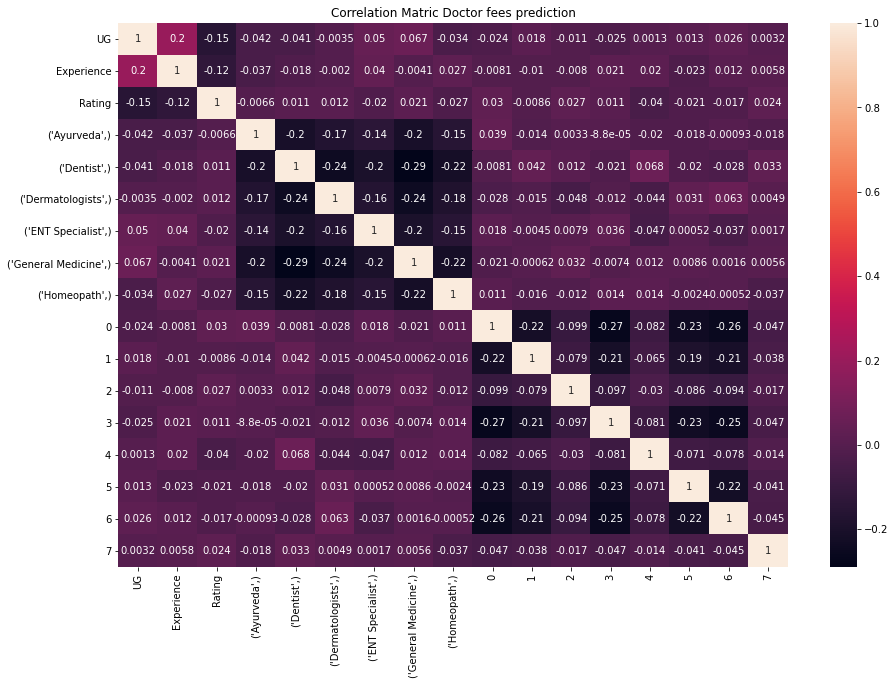

In [89]:
correlation = Doc.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric Doctor fees prediction")
plt.show()

In [92]:
Doc.shape

(1943, 17)

### There are 5852 records and 18 columns

# Check for Skewness and removal

- Note:  All the independent variables are of categorical data type hence the skewness will not be involved.

# Check for Outlier and Removal

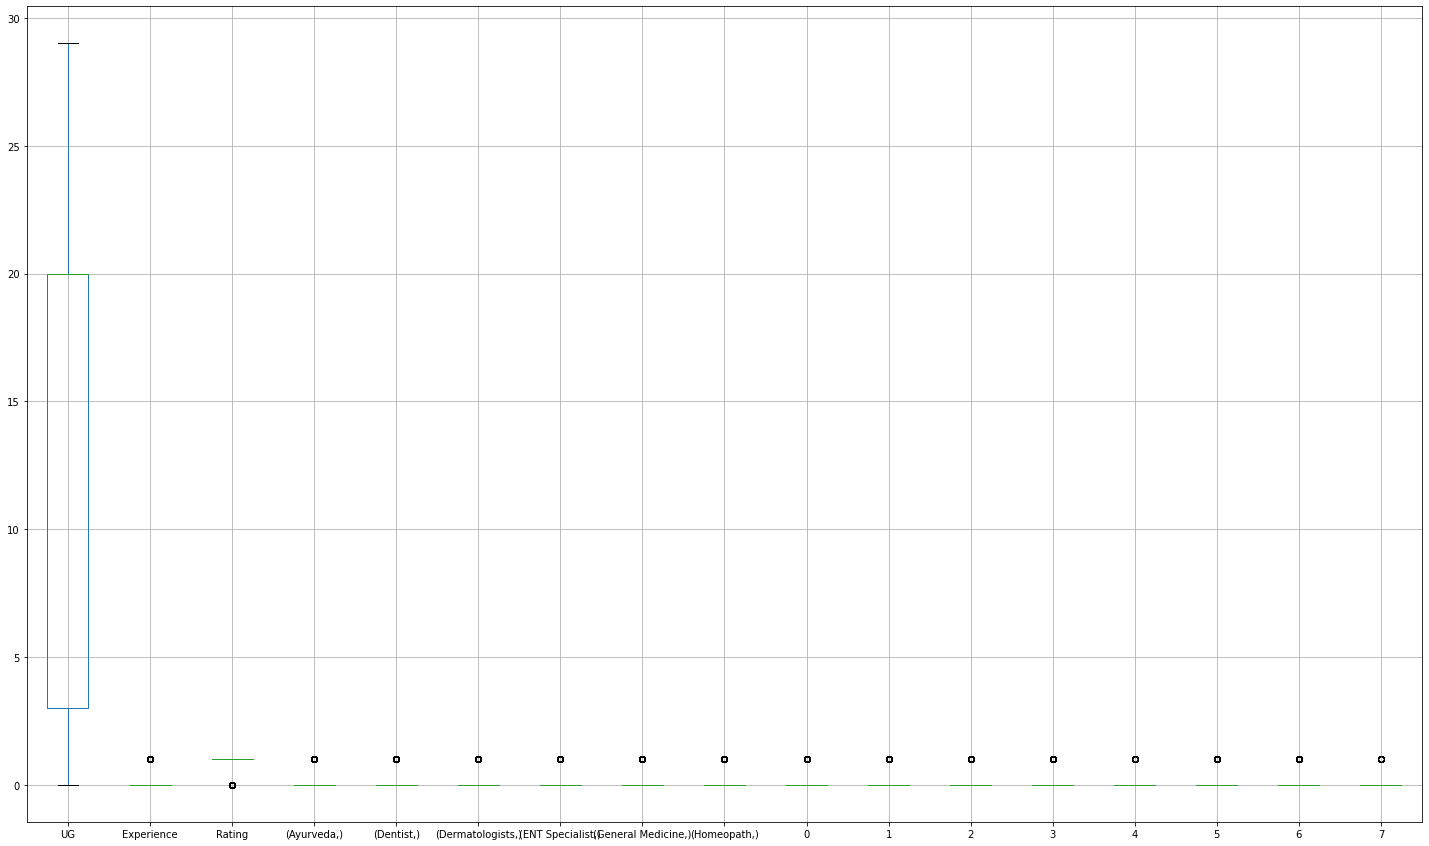

In [93]:
#plot boxplot
Doc.boxplot(figsize = [25,15])

##### no outliers

In [94]:
Doc.dtypes

UG                       int32
Experience               int32
Rating                   int32
(Ayurveda,)            float64
(Dentist,)             float64
(Dermatologists,)      float64
(ENT Specialist,)      float64
(General Medicine,)    float64
(Homeopath,)           float64
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
dtype: object

In [101]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

Doc = scale.fit_transform(Doc)

#scaled 

In [105]:
import gzip, pickle
with gzip.open("Doctorfeefinal.pklz", 'rb') as ifp:
    fees = pickle.load(ifp)

In [106]:
import joblib
fee = joblib.load("Doctorfeefinal.pklz")

In [109]:
fee

array([100, 100, 100, ..., 100, 100, 100], dtype=int64)